In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
from functools import reduce
from sklearn.metrics.pairwise import cosine_similarity

ModuleNotFoundError: No module named 'sklearn'

In [7]:
# Please modify to the featuremap dir
os.chdir('D:\\Notebook-DefDir\\SimpleCNN\\featuremap\\')
print(os.getcwd())
print(os.listdir(os.getcwd()))

D:\Notebook-DefDir\SimpleCNN\featuremap
['.ipynb_checkpoints', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'FeatureMap_ana.ipynb']


In [8]:
def extract_info(label, layer,  numberofsample):
    os.chdir(str(label))

    featuremap = []
    for i,filename in enumerate (os.listdir(os.getcwd())):
        if  bool(re.search(r'.*?f' +str(layer)+ '.*?' ,filename)):
            currentfp = np.load(filename).tolist()
            featuremap.append(currentfp[0])


    fatherdir = os.path.dirname(os.getcwd())
    os.chdir(fatherdir)
    featuremap = np.array(featuremap)
    sample_feature = np.random.choice(featuremap.shape[0], numberofsample)
    if len(featuremap.shape) == 0:
        featuremap = featuremap[sample_feature,:,:,:]
    else:
        featuremap = featuremap[sample_feature,:]
    
    return featuremap


In [9]:
def reshape(feature):
    fl_dimention = reduce(lambda x,y:x * y,feature.shape[1:])
    feature = feature.reshape([feature.shape[0],fl_dimention])
    return feature

In [10]:
feature4 = extract_info(4,2,100)
feature4_1 = extract_info(4,2,100)
feature3 = extract_info(3,2,100)
feature3_1 = extract_info(3,2,100)


feature4_reshape = reshape(feature4)
feature4_1_reshape = reshape(feature4_1)
feature3_reshape= reshape(feature3)
feature3_1_reshape= reshape(feature3)

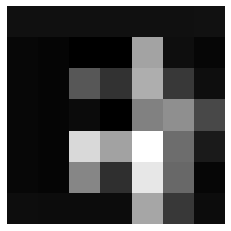

In [11]:

fig = plt.figure()
plotwindow = fig.add_subplot(111)
plt.axis('off')
plt.imshow(feature4[0][0], cmap='gray')
plt.show()
# plt.savefig("test.png")  # 保存成文件
plt.close()
    

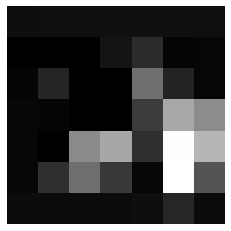

In [13]:
fig = plt.figure()
plotwindow = fig.add_subplot(111)
plt.axis('off')
plt.imshow(feature3[15][0], cmap='gray')
plt.show()
# plt.savefig("test.png")  # 保存成文件
plt.close()

In [20]:

from torchvision import transforms

transforms.Compose([
     transforms.ToTensor(),
     transforms.Scale(224)
 ])




Compose(
    CenterCrop(size=(10, 10))
    ToTensor()
    Scale(size=12, interpolation=PIL.Image.BILINEAR)
)

In [13]:
crop(feature3[15][0])

NameError: name 'crop' is not defined

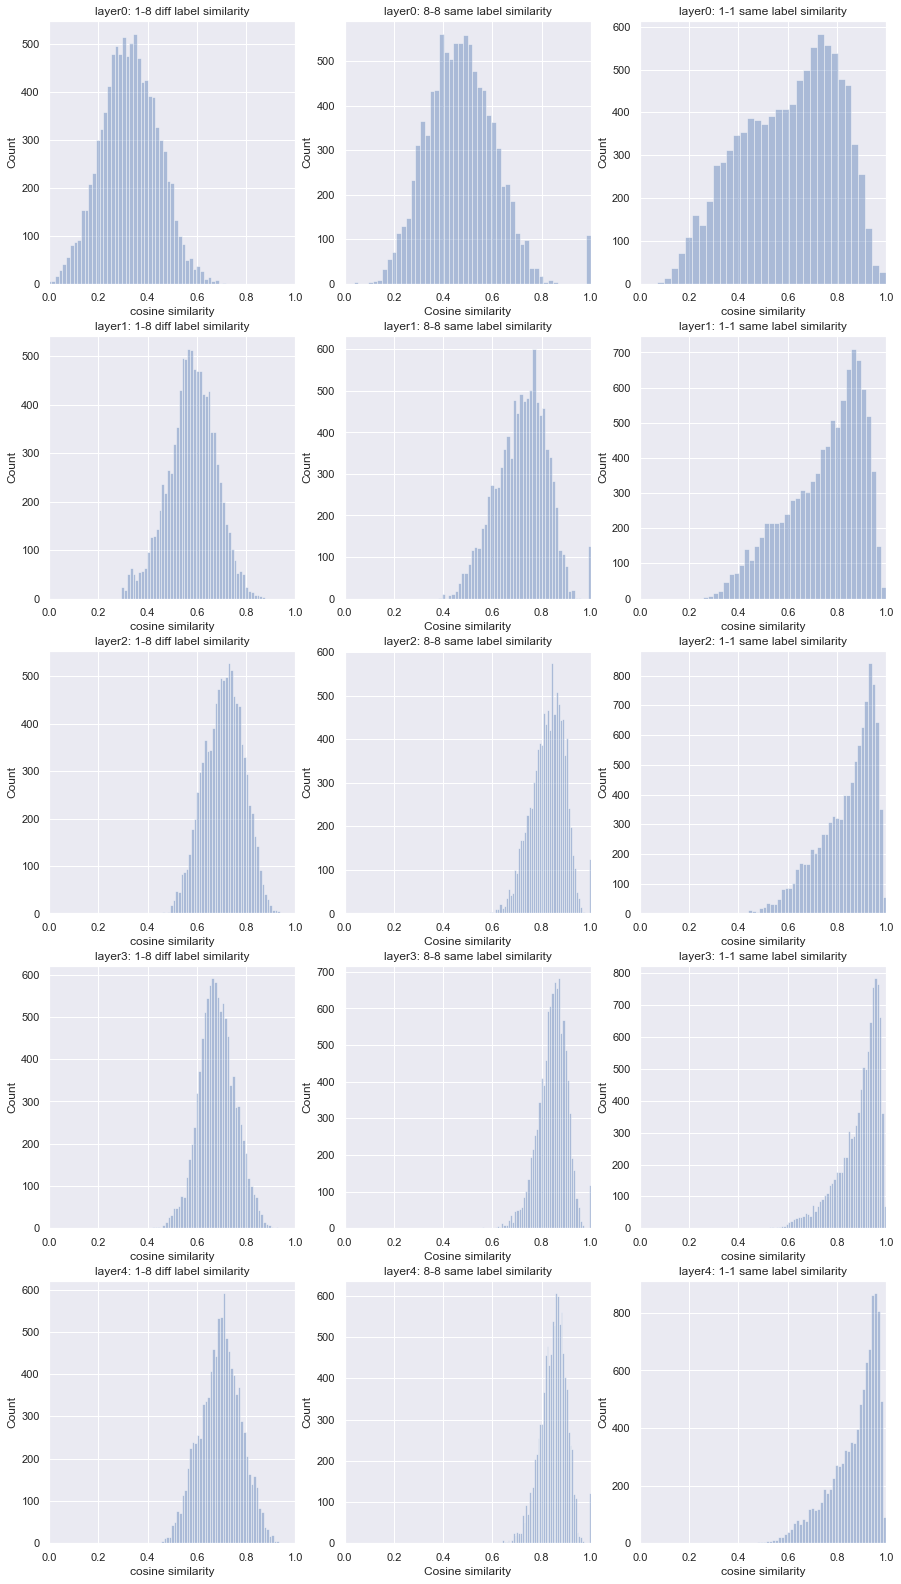

In [36]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(15,28))

for i in range(0,5):

    
    
    feature4 = extract_info(1,i,100)
    feature4_1 = extract_info(1,i,100)
    feature3 = extract_info(8,i,100)
    feature3_1 = extract_info(8,i,100)


    feature4_reshape = reshape(feature4)
    feature4_1_reshape = reshape(feature4_1)
    feature3_reshape= reshape(feature3)
    feature3_1_reshape= reshape(feature3)



    sim_4_4 =cosine_similarity(feature4_reshape,feature4_1_reshape).flatten()
    sim_3_3 =cosine_similarity(feature3_reshape,feature3_1_reshape).flatten()
    sim_3_4 = cosine_similarity(feature3_reshape,feature4_reshape).flatten()

    
    plt.subplot2grid((5,3), (i,0))
    sns.distplot(sim_3_4,kde = False)
    plt.xlim(0,1)
    plt.xlabel('cosine similarity')
    plt.ylabel('Count')
    plt.title('layer'+ str(i)+ ': 1-8 diff label similarity')

    plt.subplot2grid((5,3), (i,1))
#     plt.subplot(row ,3 ,3*i +2)
    sns.distplot(sim_3_3,kde = False)
    plt.xlim(0,1)
    plt.xlabel('Cosine similarity')
    plt.ylabel('Count')
    plt.title('layer'+ str(i)+ ': 8-8 same label similarity')
    
    plt.subplot2grid((5,3), (i,2))
#     plt.subplot(row ,3 ,3*i +3)
    sns.distplot(sim_4_4 ,kde = False)
    plt.xlim(0,1)
    plt.xlabel('cosine similarity')
    plt.ylabel('Count')
    plt.title('layer'+ str(i)+ ': 1-1 same label similarity')

plt.show()
fig.savefig('s1-8.png')
plt.close()


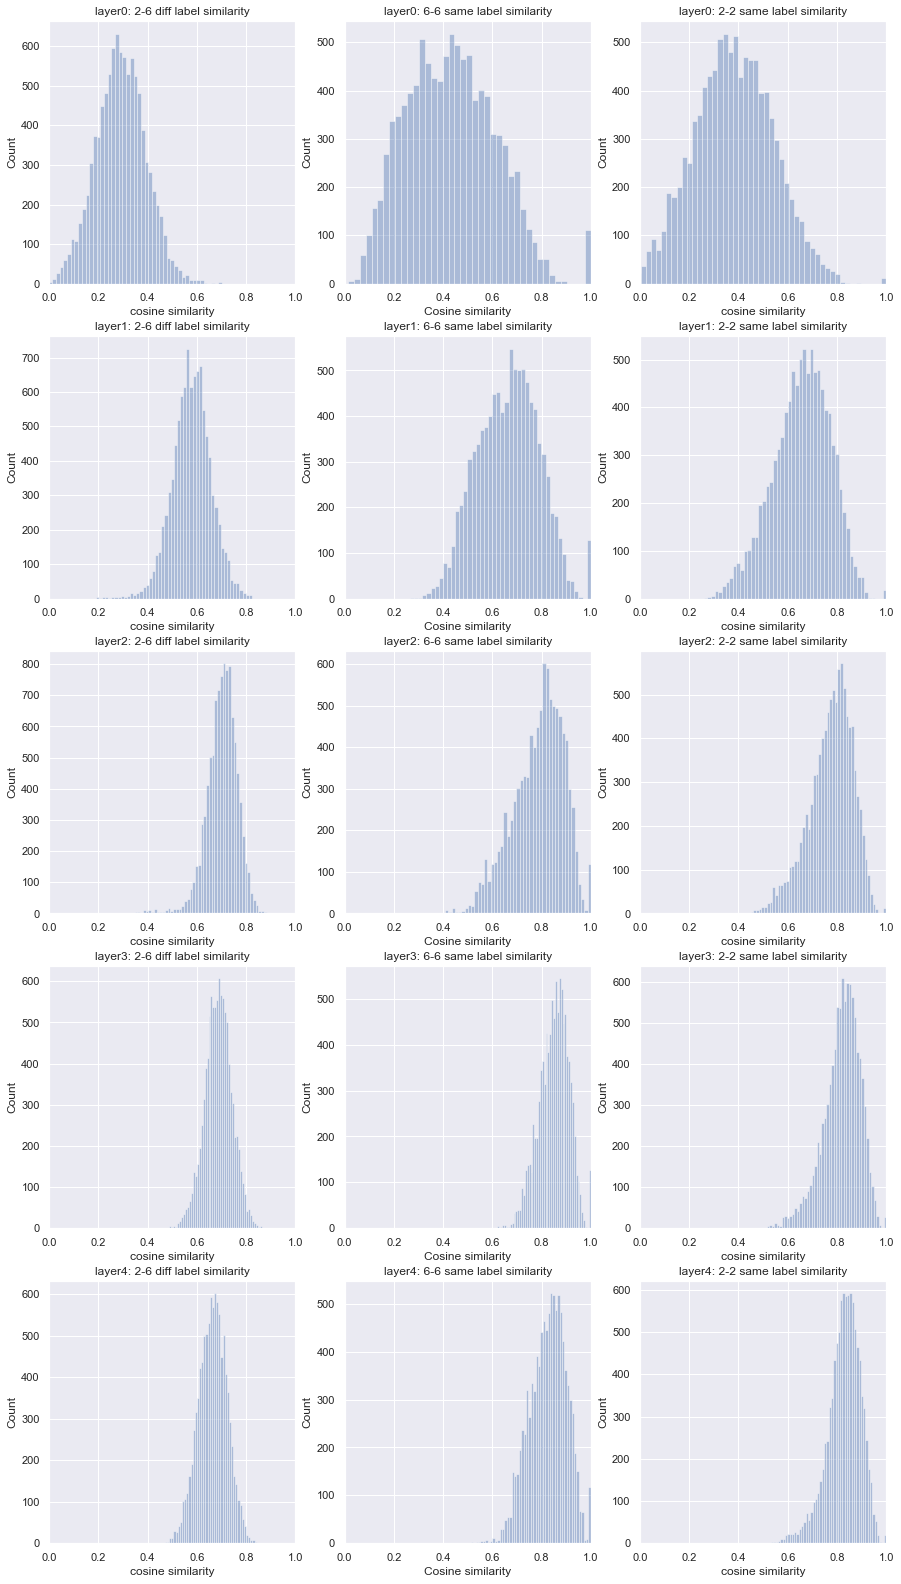

In [37]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(15,28))

for i in range(0,5):

    
    
    feature2 = extract_info(2,i,100)
    feature2_1 = extract_info(2,i,100)
    feature6 = extract_info(6,i,100)
    feature6_1 = extract_info(6,i,100)


    feature2_reshape = reshape(feature2)
    feature2_1_reshape = reshape(feature2_1)
    feature6_reshape= reshape(feature6)
    feature6_1_reshape= reshape(feature6)



    sim_2_2 =cosine_similarity(feature2_reshape,feature2_1_reshape).flatten()
    sim_6_6 =cosine_similarity(feature6_reshape,feature6_1_reshape).flatten()
    sim_2_6 = cosine_similarity(feature2_reshape,feature6_reshape).flatten()

    
    plt.subplot2grid((5,3), (i,0))
#     plt.subplot(row ,3 ,3*i +1)
    sns.distplot(sim_2_6,kde = False)
    plt.xlim(0,1)
    plt.xlabel('cosine similarity')
    plt.ylabel('Count')
    plt.title('layer'+ str(i)+ ': 2-6 diff label similarity')

    plt.subplot2grid((5,3), (i,1))
#     plt.subplot(row ,3 ,3*i +2)
    sns.distplot(sim_6_6,kde = False)
    plt.xlim(0,1)
    plt.xlabel('Cosine similarity')
    plt.ylabel('Count')
    plt.title('layer'+ str(i)+ ': 6-6 same label similarity')
    
    plt.subplot2grid((5,3), (i,2))
#     plt.subplot(row ,3 ,3*i +3)
    sns.distplot(sim_2_2,kde = False)
    plt.xlim(0,1)
    plt.xlabel('cosine similarity')
    plt.ylabel('Count')
    plt.title('layer'+ str(i)+ ': 2-2 same label similarity')

plt.show()
fig.savefig('s2-6.png')
plt.close()
